# Assignment 3

## Kunal Naidu
## UCID: 30020999

In [1]:
import scipy.integrate
import numpy as np
import math
import time
import matplotlib.pyplot as plt

In this report we will integrate the triple integral 

 $$ \int_{x=0}^1 \int_{y=0}^\sqrt{1-x^2} \int_{z=0}^\sqrt{1-x^2-y^2} \frac{dz \, dy \, dx}{1 + x^2 + y^2 + z^2} $$
 
This evaluation would be made using a function which takes advantage of scipy.integrate.romberg. scipy.integrate.romberg takes a function with a single varaible and and evaluates it over a certain range. We will also compare the use of different coordinate systems. 

To have a theoredical value to reference to the integral was calculated in Wolfram was determined to be 0.337096


We will begin with looking at an Cartesian coordinate system and evaluating the triple integral.




In [2]:
n_calls_1=0

def integral_xyz(n):
    def integral_x(x):
        
        def integral_y(y):
            
            def integral_z(z):
                global n_calls_1
                n_calls_1=n_calls_1+1
                return 1.0/(1.0+ x*x+y*y+z*z)
            
            lo, hi = 0.0, np.sqrt(np.abs(1-x*x-y*y))
            return scipy.integrate.romberg(integral_z, lo, hi, tol=n ,  divmax=15)
        
        lo, hi = 0.0, np.sqrt(np.abs(1-x*x))
        return scipy.integrate.romberg(integral_y, lo, hi, tol=n , divmax=15)
    
    lo, hi = 0.0, 1.0
    return scipy.integrate.romberg(integral_x, lo, hi, tol=n , divmax=15)

t_cartesian=time.time()
print(integral_xyz(1))
t_prime_cartesian=time.time()
delta_time_cartesian= t_prime_cartesian-t_cartesian


0.3234114395499588


Now we take the previous integral and transform it into spherical coordinates. Doing this gets us the integral:

$$ \int_{\theta=0}^{\pi/2} \int_{\phi=0}^{\pi/2} \int_{\rho=0}^1 \frac{\rho^2 \sin\phi \, d\rho \, d\phi \, d\theta}{1 + \rho^2} $$

In [3]:
n_calls=0

def integral_xyz_spherical(n):
    def integral_theta(theta):
        
        def integral_phi(phi):
            
            def integral_p(p):
                global n_calls
                n_calls=n_calls+1
                return (p*p*np.sin(phi))/(1+p*p)
            
            lo, hi = 0.0, 1.0
            return scipy.integrate.romberg(integral_p, lo, hi, tol=n ,  divmax=15)
        
        lo, hi = 0.0, np.pi/2
        return scipy.integrate.romberg(integral_phi, lo, hi, tol=n , divmax=15)
    
    lo, hi = 0.0, np.pi/2
    return scipy.integrate.romberg(integral_theta, lo, hi, tol=n , divmax=15)



# Starting time for Program to Run
t_spherical=time.time()

#Running program
print(integral_xyz_spherical(1.0e-6))

#Ending time for Program to Run
t_prime_spherical=time.time()

#Finding duration of Program to Run
delta_time_spherical= t_prime_spherical-t_spherical


0.33709577580995265


In [4]:
x_values= np.geomspace(1.0e-6,1, num=7)

n_calls=0

n_calls_1=0

result=[]
result_1=[]

for values in x_values:
    integral_xyz(values)
    result.append(n_calls_1)
    n_calls_1=0
    
    integral_xyz_spherical(values)
    result_1.append(n_calls)
    n_calls=0

Text(0,0.5,'Number of Calls to the Integrand')

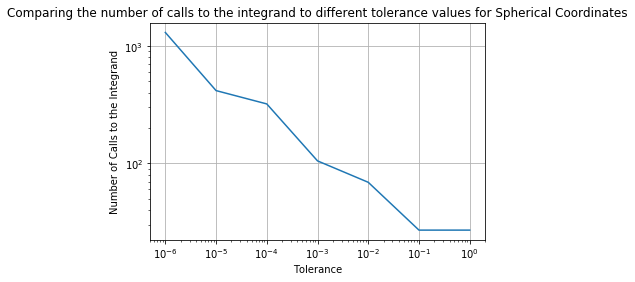

In [5]:
plt.plot(x_values, result_1, label= 'Spherical Coordinates')
plt.yscale('log')
plt.xscale('log')
plt.grid('on')
plt.title('Comparing the number of calls to the integrand to different tolerance values for Spherical Coordinates')
plt.xlabel('Tolerance')
plt.ylabel('Number of Calls to the Integrand')

Text(0,0.5,'Number of Calls to the Integrand')

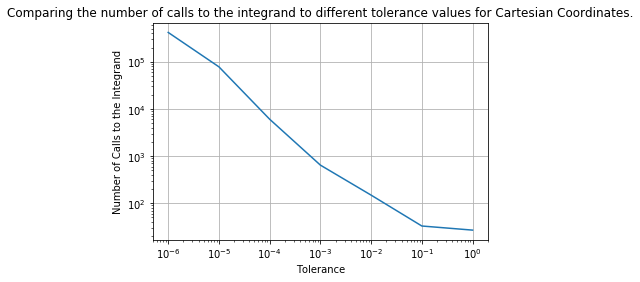

In [6]:
plt.plot( x_values, result ,label= 'Cartesian Coordinates')
plt.yscale('log')
plt.xscale('log')
plt.grid('on')
plt.title('Comparing the number of calls to the integrand to different tolerance values for Cartesian Coordinates.')
plt.xlabel('Tolerance')
plt.ylabel('Number of Calls to the Integrand')



## Analysis

Now comparing Spherical coordinates to Cartesian coordinates. We will comapare the accuracy of the methods using a percent error. We will also compare the time for the program to run and the amount of times the integrand is referenced.

In [7]:
# Cartesian coordinate system

error_cartesian= np.abs((0.337096-integral_xyz(1.0e-6))/0.337096)*100
print('The percent error for the Cartesian coordinate system is',error_cartesian,'%')

error_spherical= np.abs((0.337096-integral_xyz_spherical(1.0e-6))/0.337096)*100
print('The percent error for the Spherical coordinate system is',error_spherical,'%')

print('The integral_xyz() fuction took', delta_time_cartesian,'seconds to run.')
print('The integral_xyz_spherical() fuction took', delta_time_spherical,'seconds to run.')

The percent error for the Cartesian coordinate system is 0.00018944874077165633 %
The percent error for the Spherical coordinate system is 6.650629119296914e-05 %
The integral_xyz() fuction took 0.0019876956939697266 seconds to run.
The integral_xyz_spherical() fuction took 0.013853073120117188 seconds to run.


## Conclusion

Evaluating the integral using Cartesian coordinates took significantly longer than evualuating using Spherical coordinates. We can see the possible reason for this when plotting tolerance to the amount of times the function references back to the integrand. integral_xyz() called the integrand significantly more times than integral_xyz_spherical. Having to call on the integrad so many times could prove that the function had to make more calculations thus taking longer to evaluate. Both ways of calculating the integral were realiably accurate but evaluating with spherical coordinates was slightly more accurate. After this we can conclude that using the appropriate coordinate system when evaluating integrals can help to decrease run time of the program and increase accuracy.